In [1]:
%matplotlib inline

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as tdel
from matplotlib.dates import DateFormatter
import pathlib
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import sklearn

In [5]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'
# rc('text', usetex=True)

In [6]:
outdir = "output"

## 2D Nonlinear Manifold

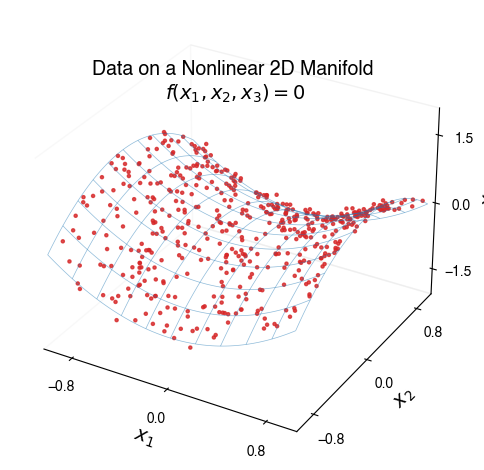

In [5]:
# Generate some example data lying on a nonlinear 2D manifold
np.random.seed(0)
N = 500
angle = np.linspace(0, 2 * np.pi, N)
x = np.random.random(N) * 2 - 1
y = np.random.random(N) * 2 - 1
z = x ** 2 - y ** 2 + np.random.randn(N) * 0.1

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='tab:red', marker='.', alpha=0.8)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-2, 2)

# Plot the true manifold underlying the data
u = np.linspace(-1, 1, 100)
v = np.linspace(-1, 1, 100)
U, V = np.meshgrid(u, v)
Z = U ** 2 - V ** 2
X = U
Y = V
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color='tab:blue',
                  linewidth=0.5, alpha=0.5)

# Remove the xy, yz, and xz faces (planes)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Set the position of the axes at (0, 0, 0)
ax.spines['left'].set_position('zero')   # X-axis
ax.spines['bottom'].set_position('zero') # Y-axis
ax.spines['left'].set_position('zero')   # Z-axis (front spine)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the number of ticks on each axis to 5
ax.xaxis.set_major_locator(MaxNLocator(3))
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.zaxis.set_major_locator(MaxNLocator(3))

# Remove the grid lines on the xy, yz, and xz planes
ax.grid(False)

# Labels
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$x_3$', fontsize=14)

ax.set_title('Data on a Nonlinear 2D Manifold \n$f\left(x_1, x_2, x_3\\right) = 0$', y=0.85, fontsize=14)
plt.tight_layout()

# Save fig
fig.savefig(pathlib.Path(outdir, "2dmanifold.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "2dmanifold.svg"), bbox_inches='tight')   

## Circle manifold

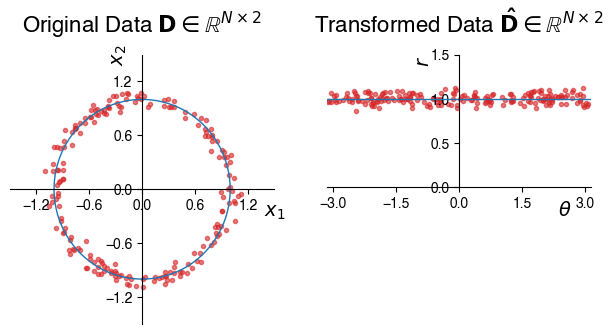

In [6]:
N = 200
t = np.random.random(N) * 2 * np.pi - np.pi
x = np.cos(t) + np.random.randn(N) * 0.05
y = np.sin(t) + np.random.randn(N) * 0.05

fig = plt.figure(figsize=(7.5, 3.5))
gs = gridspec.GridSpec(10, 2, width_ratios=[1, 1])

ax = fig.add_subplot(gs[:, 0])
ax.scatter(x, y, c='tab:red', marker='.', alpha=0.6)
ax.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), c='tab:blue', linewidth=1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.xaxis.set_label_coords(1.0, 0.45)  # Adjust the values as needed
ax.set_ylabel('$x_2$', fontsize=14)
ax.yaxis.set_label_coords(0.45, 1.0)  # Adjust the values as needed
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.set_title(r'Original Data $\mathbf{D} \in \mathbb{R}^{N \times 2}$',
             fontsize=16, y=1.05)

ax = fig.add_subplot(gs[:5, 1])
ax.scatter(t, np.linalg.norm(np.array([x, y]), axis=0),
           c='tab:red', marker='.', alpha=0.6)
ax.axhline(y=1, c='tab:blue', linewidth=1)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0, 1.5)
ax.set_xlabel(r'$\theta$', fontsize=14)
ax.xaxis.set_label_coords(0.9, -0.1)  # Adjust the values as needed
ax.set_ylabel('$r$', fontsize=14)
ax.yaxis.set_label_coords(0.4, 0.95)  # Adjust the values as needed
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.set_title(r'Transformed Data $\mathbf{\hat{D}} \in \mathbb{R}^{N \times 2}$',
             fontsize=16, y=1.1)

# Save fig
fig.savefig(pathlib.Path(outdir, "circle_dimred.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "circle_dimred.svg"), bbox_inches='tight')   

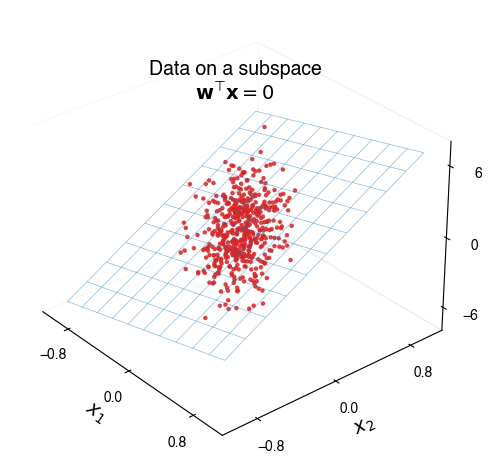

In [7]:
# Generate some example data lying on a nonlinear 2D manifold
np.random.seed(0)
N = 500
angle = np.linspace(0, 2 * np.pi, N)
# x = np.random.randn(N) / 6
# y = np.random.randn(N) / 3
_xy = np.random.multivariate_normal([0, 0], [[3, -1.5], [-1.5, 2]], N) / 6
x = _xy[:, 0]
y = _xy[:, 1]
wx, wy = 2.0, 5.0
z = wx * x + wy * y + np.random.randn(N)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-40)  # Adjust the angles as needed
ax.scatter(x, y, z, c='tab:red', marker='.', alpha=0.8)
# ax.scatter(-1.5 * np.ones(N), y, z, c='gray', marker='.', alpha=0.1)
# ax.scatter(x, 1.5 * np.ones(N), z, c='gray', marker='.', alpha=0.1)
# ax.scatter(x, y, -6 * np.ones(N), c='gray', marker='.', alpha=0.1)
# ax.set_xlim(-1.1, 1.1)
# ax.set_ylim(-1.1, 1.1)
# ax.set_zlim(-1, 2)

# Plot the true manifold underlying the data
u = np.linspace(-1, 1, 100)
v = np.linspace(-1, 1, 100)
U, V = np.meshgrid(u, v)
Z = wx * U + wy * V
X = U
Y = V
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color='tab:blue',
                  linewidth=0.5, alpha=0.5)

# Remove the xy, yz, and xz faces (planes)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Set the position of the axes at (0, 0, 0)
ax.spines['left'].set_position('zero')   # X-axis
ax.spines['bottom'].set_position('zero') # Y-axis
ax.spines['left'].set_position('zero')   # Z-axis (front spine)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the number of ticks on each axis to 5
ax.xaxis.set_major_locator(MaxNLocator(3))
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.zaxis.set_major_locator(MaxNLocator(3))

# Remove the grid lines on the xy, yz, and xz planes
ax.grid(False)

# Labels
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$x_3$', fontsize=14)


# Remove the bounding box
# ax.set_box_off()

ax.set_title('Data on a subspace\n$\mathbf{w}^\\top\mathbf{x} = 0$', y=0.85, fontsize=14)
plt.tight_layout()

# Save fig
fig.savefig(pathlib.Path(outdir, "2dsubspace.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "2dsubspace.svg"), bbox_inches='tight')   

## PCA demonstration

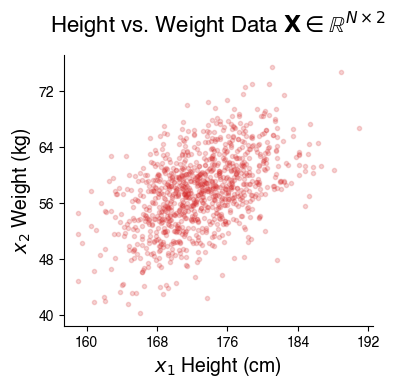

In [8]:
hw_data = pd.read_csv("SOCR-HeightWeight.csv", index_col=0)
# Change units to meters and kilograms
hw_data['Height'] = hw_data['Height(Inches)'] * 2.54
hw_data['Weight'] = hw_data['Weight(Pounds)'] * 0.453592
# Remove the mean
hw_data['h'] = hw_data['Height'] - hw_data['Height'].mean()
hw_data['w'] = hw_data['Weight'] - hw_data['Weight'].mean()

# Scatter plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
_sample = hw_data.sample(1000)
ax.plot(_sample['Height'], _sample['Weight'], '.', c='tab:red', alpha=0.2)
# ax.plot(hw_data['Height'], hw_data['Weight'], '.', c='tab:red', alpha=0.1)
ax.set_xlabel('$x_1$ Height (cm)', fontsize=14)
ax.set_ylabel('$x_2$ Weight (kg)', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.set_title('Height vs. Weight Data $\mathbf{X} \in \mathbb{R}^{N \\times 2}$', fontsize=16, y=1.05)
plt.tight_layout()

# Save fig
fig.savefig(pathlib.Path(outdir, "height_weight.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "height_weight.svg"), bbox_inches='tight')


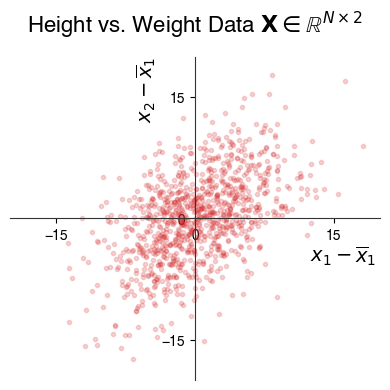

In [9]:
# Scatter plot
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.plot(_sample['h'], _sample['w'], '.', c='tab:red', alpha=0.2)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_xlabel('$x_1 - \overline{x}_1$', fontsize=14)
ax.set_ylabel('$x_2 - \overline{x}_1$', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_major_locator(MaxNLocator(3))
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.xaxis.set_label_coords(0.9, 0.42)  # Adjust the values as needed
ax.yaxis.set_label_coords(0.4, 0.9)  # Adjust the values as needed
ax.spines['left'].set_color("0.2")
ax.spines['bottom'].set_color("0.2")
ax.set_title('Height vs. Weight Data $\mathbf{X} \in \mathbb{R}^{N \\times 2}$', fontsize=16, y=1.05)
plt.tight_layout()

# Save fig
fig.savefig(pathlib.Path(outdir, "height_weight_womean.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "height_weight_womean.svg"), bbox_inches='tight')


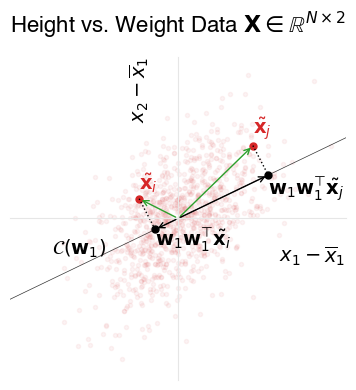

In [10]:
# Max projection demo
w1 = np.array([2., 1])
w1 /= np.linalg.norm(w1)

# Scatter plot
fig = plt.figure(figsize=(3.75, 4))
ax = fig.add_subplot(111)
_xy = _sample.loc[:, ['h', 'w']].values
ax.plot(_xy[:, 0], _xy[:, 1], '.', c='tab:red', alpha=0.05)
_w1ss = np.array([-100 * w1, 100 * w1])
ax.plot(_w1ss[:, 0], _w1ss[:, 1], lw=0.5, ls='-', c='black', alpha=0.8)

# Selected point
_xysel = _xy[_xy[:, 0].argsort()][960]
_xyproj = np.dot(w1, _xysel) * w1
ax.plot([_xysel[0]], [_xysel[1]], '.', c='tab:red', alpha=1, markersize=10)
ax.plot([_xysel[0], _xyproj[0]], [_xysel[1], _xyproj[1]], ls='dotted', c='black', lw=1, alpha=1)
ax.plot([_xyproj[0]], [_xyproj[1]], '.', c='black', alpha=1, markersize=10)
ax.set_xlabel('$x_1 - \overline{x}_1$', fontsize=14)
ax.set_ylabel('$x_2 - \overline{x}_1$', fontsize=14)

# Specify the point to which you want to add an arrow
data_point = _xysel

# Draw an arrow pointing to the specified point
ax.annotate('', data_point, xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='tab:green', lw=1))
ax.annotate('', _xyproj, xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=1))
ax.text(*(_xysel + [0, 0.5]), '$\\tilde{\mathbf{x}}_j$',
        ha='left', va='bottom', color='tab:red', fontsize=14)
ax.text(*(_xyproj + [0, -3.5]), '$\mathbf{w}_1\mathbf{w}_1^\\top\\tilde{\mathbf{x}}_j$',
        ha='left', va='bottom', color='black', fontsize=14)

# Selected point
_xysel = _xy[_xy[:, 0].argsort()][155]
_xyproj = np.dot(w1, _xysel) * w1
ax.plot([_xysel[0]], [_xysel[1]], '.', c='tab:red', alpha=1, markersize=10)
ax.plot([_xysel[0], _xyproj[0]], [_xysel[1], _xyproj[1]], ls='dotted', c='black', lw=1, alpha=1)
ax.plot([_xyproj[0]], [_xyproj[1]], '.', c='black', alpha=1, markersize=10)
ax.set_xlabel('$x_1 - \overline{x}_1$', fontsize=14)
ax.set_ylabel('$x_2 - \overline{x}_1$', fontsize=14)

# Specify the point to which you want to add an arrow
data_point = _xysel

# Draw an arrow pointing to the specified point
ax.annotate('', data_point, xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='tab:green', lw=1))
ax.annotate('', _xyproj, xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=1))
ax.text(*(_xysel + [0, 0.5]), '$\\tilde{\mathbf{x}}_i$',
        ha='left', va='bottom', color='tab:red', fontsize=14)
ax.text(*(_xyproj + [0, -3]), '$\mathbf{w}_1\mathbf{w}_1^\\top\\tilde{\mathbf{x}}_i$',
        ha='left', va='bottom', color='black', fontsize=14)
# Subspace of w1
ax.text(*([-15, -5]), '$\mathcal{C}\left(\mathbf{w}_1\\right)$',
        ha='left', va='bottom', color='black', fontsize=14)

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_major_locator(MaxNLocator(3))
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.xaxis.set_label_coords(0.9, 0.42)  # Adjust the values as needed
ax.yaxis.set_label_coords(0.42, 0.9)  # Adjust the values as needed
ax.spines['left'].set_color("0.9")
ax.spines['bottom'].set_color("0.9")
ax.set_title('Height vs. Weight Data $\mathbf{X} \in \mathbb{R}^{N \\times 2}$', fontsize=16, y=1.05)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.tight_layout()

# Save fig
fig.savefig(pathlib.Path(outdir, "maxproj_demo.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "maxproj_demo.svg"), bbox_inches='tight')

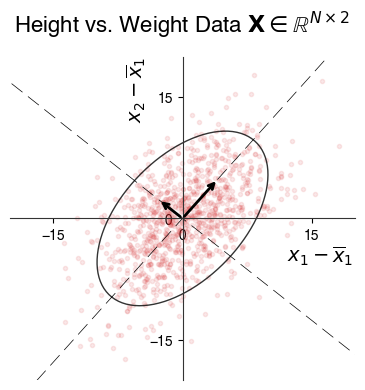

In [11]:
_X = _sample.loc[:, ['h', 'w']].values
# Compute the covariance matrix
cov = np.cov(_X.T)
# Compute the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov)
# Sort the eigenvectors by decreasing eigenvalues
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Scatter plot
fig = plt.figure(figsize=(3.75, 4))
ax = fig.add_subplot(111)
ax.plot(_sample['h'], _sample['w'], '.', c='tab:red', alpha=0.1)

# Draw the principal components
_w1ss = np.array([-100 * eigvecs[:, 0], 100 * eigvecs[:, 0]])
ax.plot(_w1ss[:, 0], _w1ss[:, 1], lw=0.5, ls='-', dashes=[20, 10], c='black')
_w2ss = np.array([-100 * eigvecs[:, 1], 100 * eigvecs[:, 1]])
ax.plot(_w2ss[:, 0], _w2ss[:, 1], lw=0.5, ls='-', dashes=[20, 10], c='black')
ax.annotate('', -np.sqrt(eigvals[0]) * eigvecs[:, 0], xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=2))
ax.annotate('', np.sqrt(eigvals[1]) * eigvecs[:, 1], xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='black', lw=2))

# Draw the covariance ellipse
theta = np.linspace(0, 2 * np.pi, 100)
a, b = np.sqrt(eigvals)
_xy = eigvecs @ np.array([a * np.cos(theta),
                          b * np.sin(theta)]) 
ax.plot(2 * _xy[0, :], 2 * _xy[1, :], lw=1, ls='-', c='black', alpha=0.8)

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_xlabel('$x_1 - \overline{x}_1$', fontsize=14)
ax.set_ylabel('$x_2 - \overline{x}_1$', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_major_locator(MaxNLocator(3))
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.xaxis.set_label_coords(0.9, 0.42)  # Adjust the values as needed
ax.yaxis.set_label_coords(0.4, 0.9)  # Adjust the values as needed
ax.spines['left'].set_color("0.2")
ax.spines['bottom'].set_color("0.2")
ax.set_title('Height vs. Weight Data $\mathbf{X} \in \mathbb{R}^{N \\times 2}$', fontsize=16, y=1.05)
plt.tight_layout()

# Save fig
fig.savefig(pathlib.Path(outdir, "height_weight_pcs.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "height_weight_pcs.svg"), bbox_inches='tight')


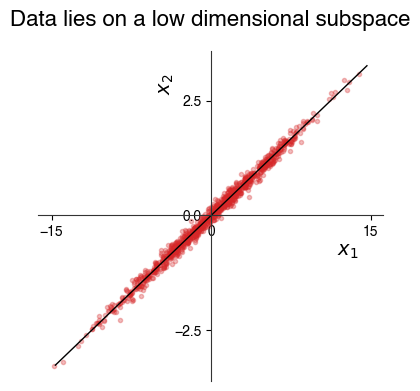

In [41]:
# Large low-dimensional data set.
mean = np.array([0, 0])
cov = np.array([[20, 4.45], [4.45, 1]])
X = np.random.multivariate_normal(mean=mean, cov=cov, size=1000)

# Compute the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov)
# Sort the eigenvectors by decreasing eigenvalues
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
_eigspace1 = np.vstack((-15 * eigvecs[:, 0], 15 * eigvecs[:, 0])).T

# Scatter plot
fig = plt.figure(figsize=(3.75, 4))
ax = fig.add_subplot(111)
ax.plot(X[:, 0], X[:, 1], '.', c='tab:red', alpha=0.3)
ax.plot(_eigspace1[0], _eigspace1[1], lw=1, color="black")
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_major_locator(MaxNLocator(3))
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.xaxis.set_label_coords(0.9, 0.42)  # Adjust the values as needed
ax.yaxis.set_label_coords(0.4, 0.9)  # Adjust the values as needed
ax.spines['left'].set_color("0.2")
ax.spines['bottom'].set_color("0.2")
ax.set_title('Data lies on a low dimensional subspace', fontsize=16, y=1.05)
plt.tight_layout()

# Save fig
fig.savefig(pathlib.Path(outdir, "pca_lowdim.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "pca_lowdim.svg"), bbox_inches='tight')

## PCA on the Olivetti face dataset

In [6]:
data1 = pd.read_csv("../../data/multiobj_all.csv", sep=",", index_col=False)
data2 = pd.read_csv("../../data/multiobj_sel.csv", sep=",", index_col=False)

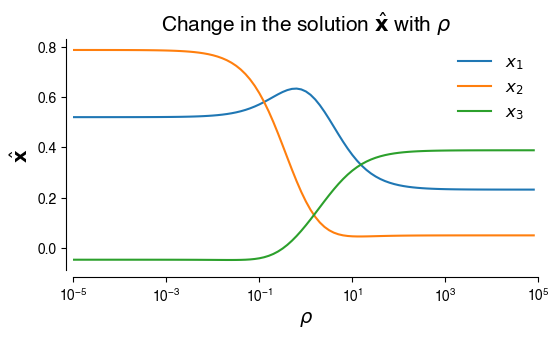

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.semilogx(data1.l, data1.x1, label="$x_1$")
ax.semilogx(data1.l, data1.x2, label="$x_2$")
ax.semilogx(data1.l, data1.x3, label="$x_3$")
ax.set_xlim(1e-5, 1e5)
ax.legend(loc="upper right", frameon=False, fontsize=12)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Offset the spines
ax.spines["left"].set_position(('outward', 5))
ax.spines["bottom"].set_position(('outward', 5))

ax.set_xlabel(r"$\rho$", fontsize=14)
ax.set_ylabel(r"$\hat{\mathbf{x}}$", fontsize=14)

ax.set_title(r"Change in the solution $\hat{\mathbf{x}}$ with $\rho$", fontsize=15) 

# Save figure
fig.savefig(pathlib.Path(outdir, "multiobj_soln.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "multiobj_soln.svg"), bbox_inches='tight')    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


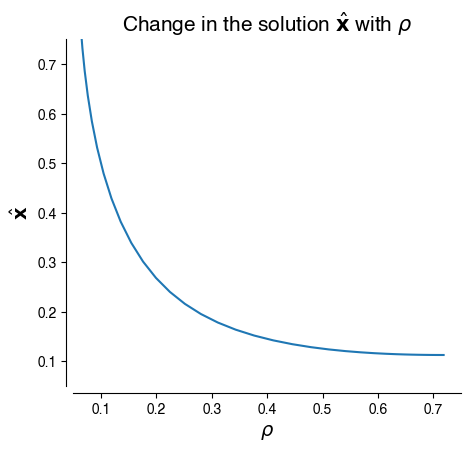

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4.5))
ax.plot(data1.J1, data1.J2)
ax.set_xlim(0.05, 0.75)
ax.set_ylim(0.05, 0.75)
ax.legend(loc="upper right", frameon=False, fontsize=12)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Offset the spines
ax.spines["left"].set_position(('outward', 5))
ax.spines["bottom"].set_position(('outward', 5))

ax.set_xlabel(r"$\rho$", fontsize=14)
ax.set_ylabel(r"$\hat{\mathbf{x}}$", fontsize=14)

ax.set_title(r"Change in the solution $\hat{\mathbf{x}}$ with $\rho$", fontsize=15) 

# Save figure
fig.savefig(pathlib.Path(outdir, "multiobj_opt.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "multiobj_opt.svg"), bbox_inches='tight')    